In [48]:
import numpy as np
import codecs

# trainFile = r'train.csv'
trainFile = r'D:\文档\城规\训练集.csv'
testFile = r'D:\文档\城规\预测集输入参数.csv'

#这一行是为了解决编码的问题，直接使用loadtxt打开文件，编码出错
labelfilecp = codecs.open(trainFile, encoding = 'cp1252')
filecp = codecs.open(trainFile, encoding = 'cp1252')
testFilecp = codecs.open(testFile,encoding='cp1252')
#usecols可以使用usecols=range(2,5)这种方式选择列读取
#trainData = np.loadtxt(filecp,dtype=bytes,delimiter=",",skiprows=0,usecols=0)

#中文数据的问题，需要先解码
# print(str(trainData[0].decode('gbk')))
dataLabel = np.loadtxt(labelfilecp,dtype=bytes,delimiter=',',skiprows=1,usecols=range(1,25)).astype(float)
print(dataLabel)

trainData = np.loadtxt(filecp,dtype=bytes,delimiter=',',skiprows=1,usecols=range(26,32)).astype(float)
testData = np.loadtxt(testFilecp,dtype=bytes,delimiter=',',skiprows=1,usecols=range(1,6)).astype(float)
print(trainData)
print(testData)

[[  66.89   64.84   65.43   65.75   66.24   61.45   60.25   68.27  129.52
   142.72  164.33  161.68  180.72  172.66  164.34  133.52  133.16  129.21
   114.61  113.85   86.56   66.46   67.91   64.59]
 [  64.71   65.02   64.62   63.72   67.41   60.08   62.68   66.27  130.6
   140.69  180.78   89.9    82.91  150.23  153.32   98.33  100.09  108.41
    92.02  103.33   84.88   58.19   64.     67.03]
 [  61.53   64.79   61.06   60.89   59.74   62.9    61.91   89.97  241.61
   286.65  291.66  268.16  216.59  271.78  201.36  217.14  248.61  202.6
   123.43  118.84   95.23   71.48   67.04   68.78]
 [  59.83   61.84   61.86   60.58   59.81   62.44   63.72   83.21  241.35
   278.66  265.27  239.74  211.81  215.78  210.34  212.7   235.84  199.61
   120.24  128.8   105.98   75.54   70.58   72.31]
 [  64.36   78.35   93.48   42.29   40.81   79.05   71.24   44.65  242.64
   312.55  309.92  322.01  275.3   261.11  267.81  255.61  269.56  235.65
   147.79  138.21  116.4    87.99   90.99   75.54]
 [  66.

In [56]:
def bayesian(x,y,test):
#     print("==========bayes============")
    from sklearn import linear_model
    clf = linear_model.BayesianRidge()
    clf.fit(x,y)
    res = clf.predict(test)
    return res

    
def svmGrgression(x,y,test):
    print("========svm===============")
    from sklearn import svm
    clf = svm.SVR()
    clf.fit(x,y)
    res = clf.predict(test)
    print(res)
    
def decisionTree(x,y,test):
    print("========decisionTree===========")
    from sklearn import tree
    clf = tree.DecisionTreeRegressor()
    clf.fit(x,y)
    res = clf.predict(test)
#     print(res)
    return res
    
def gradientBoosting(x,y,test):
    print("=============gradient================")
    from sklearn.ensemble import GradientBoostingRegressor
    est = GradientBoostingRegressor().fit(x,y)
    res = est.predict(test)
#     print(res)

    
def mlp(x,y,test):
    print("=============MLP================")
    from sklearn.neural_network import MLPRegressor
    mlpRegressor = MLPRegressor()
    mlpRegressor.fit(x,y)
    res = mlpRegressor.predict(test)
#     print(res)
    return res
    
def rf(x,y,test):
    print("=============rf==================")
    from sklearn.ensemble import RandomForestRegressor
    rfgr = RandomForestRegressor()
    rfgr.fit(x,y)
    res = rfgr.predict(test)
#     print(res)
    return res


x = trainData[:,1:6]
y = trainData[:,0]

import pandas as pd
columns = ['决策树1号','决策树2号','MLP1号','MLP2号','RF1号','RF2号','bayes 1号','bayes 2号']
index = ['0:00',"1:00","2:00","3:00"]
df = pd.DataFrame([],columns=columns)
print("==========bayes============")

bayesian(x,y,testData)
bayesianArr = np.zeros((24,2))
for i in range(0,24):
    r = bayesian(x,dataLabel[:,i],testData)
    bayesianArr[i,0] = r[0]
    bayesianArr[i,1] = r[1]
    
print(bayesianArr.shape)    
print(bayesianArr)    
# bayesian(x,dataLabel,testData)
svmGrgression(x,y,testData)
# svmGrgression(x,dataLabel,testData)
decisionTree(x,y,testData)

res = decisionTree(x,dataLabel,testData)
df['决策树1号'] = res[0]
df['决策树2号'] = res[1]

gradientBoosting(x,y,testData)
# gradientBoosting(x,dataLabel,testData)
mlp(x,y,testData)
res = mlp(x,dataLabel,testData)
df['MLP1号'] = res[0]
df['MLP2号'] = res[1]
rf(x,y,testData)
res = rf(x,dataLabel,testData)
df['RF1号'] = res[0]
df['RF2号'] = res[1]
df['bayes 1号'] = bayesianArr[:,0]
df['bayes 2号'] = bayesianArr[:,1]
df['mean'] = df.mean(1)
print(df)

==========bayes============
(24, 2)
[[  66.98215153   67.22082409]
 [  67.95214974   68.19969282]
 [  67.56169948   67.56373834]
 [  65.09097345   65.26480389]
 [  64.2483873    64.14995202]
 [  66.00866003   66.16775146]
 [  64.35473629   64.35471362]
 [  73.89704977   73.62819092]
 [ 215.21916944  215.21955593]
 [ 280.86351537  280.50507254]
 [ 232.08546322  232.08722155]
 [ 275.71361782  282.64585506]
 [ 254.38062673  259.79841216]
 [ 260.21588925  259.27724909]
 [ 256.53732661  260.82291514]
 [ 255.32353723  262.34342132]
 [ 208.8227975   208.82300296]
 [ 213.54292214  221.90968163]
 [ 114.09714292  114.09703085]
 [ 117.66441059  117.66468297]
 [ 108.33561938  108.13339511]
 [  75.41089033   75.68030119]
 [  71.34634189   71.615293  ]
 [  69.47430495   69.69983276]]
========svm===============
[ 146.55143498  147.12589835]
========decisionTree===========
========decisionTree===========
=============gradient================
=============MLP================
=============MLP===========

C:\Users\THINK\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


In [61]:
import csv
with open(trainFile,'r') as csvFile:
            reader = csv.reader(csvFile)
            headers = next(reader)
            print(headers)
            for line in reader:
#                 print(line)

SyntaxError: unexpected EOF while parsing (<ipython-input-61-16c1b25b32d8>, line 7)

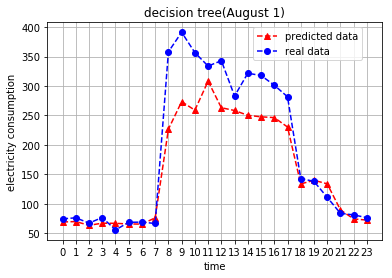

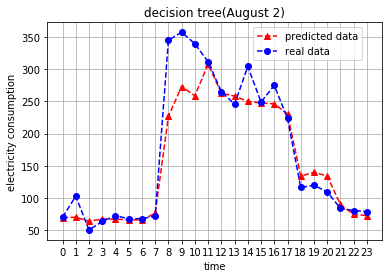

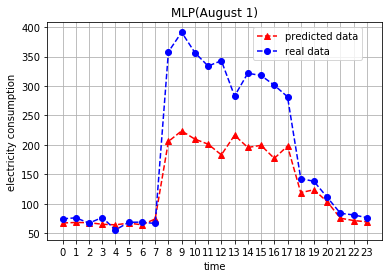

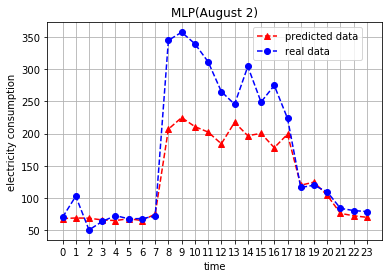

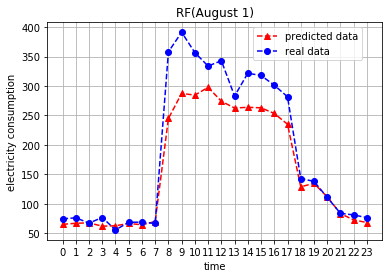

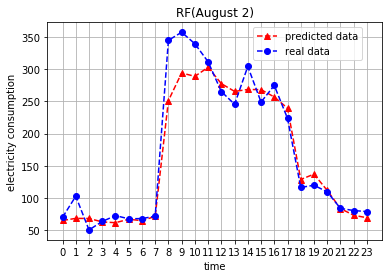

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt

def plotRes(x,y,x1,y1,title):
    plt.plot(x,y,'r^--',label='predicted data')
    plt.plot(x1,y1,'bo--',label='real data')
#     plt.plot(x,y,'ro-',x1,y1,'b^-')
    plt.grid()
    plt.title(title)
    plt.xlabel('time')
    plt.ylabel('electricity consumption')
    plt.xticks(range(0,24),range(0,24),rotation=0)
    plt.legend(bbox_to_anchor=[0.6, 1]) 
    plt.show()

realFile = r'D:\文档\城规\待测样本真值1.csv'
realFilecp = codecs.open(realFile,encoding='cp1252')
realData = np.loadtxt(realFilecp,dtype=bytes,delimiter=',',skiprows=1,usecols=(1,2)).astype(float)
# print(df['决策树1号'])
# print(realData[:,1])
plotRes(range(0,24),df['决策树1号'],range(0,24),realData[:,0],'decision tree(August 1)')
plotRes(range(0,24),df['决策树2号'],range(0,24),realData[:,1],'decision tree(August 2)')

plotRes(range(0,24),df['MLP1号'],range(0,24),realData[:,0],'MLP(August 1)')
plotRes(range(0,24),df['MLP2号'],range(0,24),realData[:,1],'MLP(August 2)')

plotRes(range(0,24),df['RF1号'],range(0,24),realData[:,0],'RF(August 1)')
plotRes(range(0,24),df['RF2号'],range(0,24),realData[:,1],'RF(August 2)')


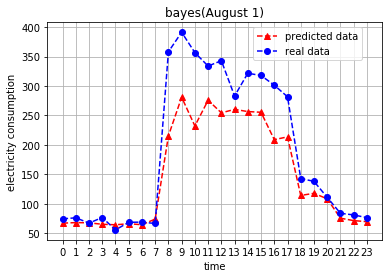

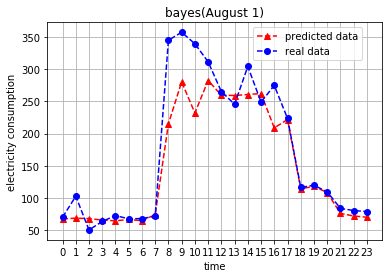

In [55]:

plotRes(range(0,24),bayesianArr[:,0],range(0,24),realData[:,0],'bayes(August 1)')
plotRes(range(0,24),bayesianArr[:,1],range(0,24),realData[:,1],'bayes(August 1)')